
CSYE7105 Parallel Machine Learning & AI - 2020 Fall

Instructor: Dr. Handan Liu

Week 8-2: Tune number of processors for XGBoost


In [1]:
from pandas import read_csv
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from time import time
import matplotlib.pyplot as plt
import os

In [2]:
# load data
data = read_csv('train.csv')
dataset = data.values
data.shape

(61878, 95)

In [3]:
# split data into X and y
X = dataset[:30000, 0:94]
y = dataset[:30000,94]

In [4]:
X.shape

(30000, 94)

In [5]:
# encode string class values as integers
label_encoded_y = LabelEncoder().fit_transform(y)

In [6]:
t1 = time()
model = XGBClassifier(n_jobs=1)
model.fit(X, label_encoded_y)
t2 = time() - t1
print("Elapsed time = ", t2)

Elapsed time =  17.219859838485718


In [7]:
t1 = time()
model = XGBClassifier(n_jobs=4)
model.fit(X, label_encoded_y)
t2 = time() - t1
print("Elapsed time = ", t2)

Elapsed time =  5.832036972045898


In [8]:
result = []
njobs = [1,2,4,8]
for n in njobs:
    t1 = time()
    model = XGBClassifier(n_jobs=n)
    model.fit(X, label_encoded_y)
    t2 = time() - t1
    print(n, t2)
    result.append(t2)

1 16.99815034866333
2 9.243927717208862
4 5.622581481933594
8 4.49611759185791


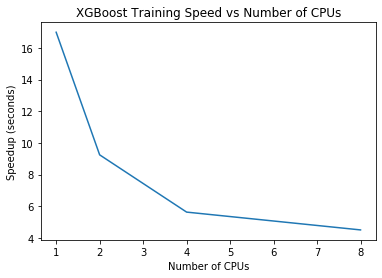

In [9]:
# plot
plt.plot(njobs, result)
plt.ylabel('Speedup (seconds)')
plt.xlabel('Number of CPUs')
plt.title('XGBoost Training Speed vs Number of CPUs')
plt.show()